In [1]:
# Python library and module imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils

In [2]:
# Validation run number
run = 8

# Load the np array from the disk into memory
softmaxes = np.load("softmax" + str(run) + ".npy")
labels = np.load("labels" + str(run) + ".npy")
predictions = np.load("predictions" + str(run) + ".npy")
energies = np.load("energies" + str(run) + ".npy")

# Validate the shapes of the loaded array
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

softmaxes shape :  (90000, 3)
labels shape :  (90000,)
predictions shape :  (90000,)
energies shape :  (90000,)


In [77]:
# Extact the energies for the corresponding particles
gamma_energies = energies[labels==0]
e_energies = energies[labels==1]
mu_energies = energies[labels==2]

# Convert true particle energies to visible energies
m_mu = 105.7
m_e = 0.511
m_p = 0.511

# Constant for the inverse refractive index of water
beta = 0.75

# Denomator for the scaling factor to be used for the cherenkov threshold
dem = math.sqrt(1 - beta**2)

for i in range(len(gamma_energies)):
    gamma_energies[i] = max((gamma_energies[i] - (m_e / dem) - (m_p / dem)), 0)
    
for i in range(len(e_energies)):
    e_energies[i] = max((e_energies[i] - (m_e / dem)), 0)
    
for i in range(len(mu_energies)):
    mu_energies[i] = max((mu_energies[i] - (m_mu / dem)), 0)

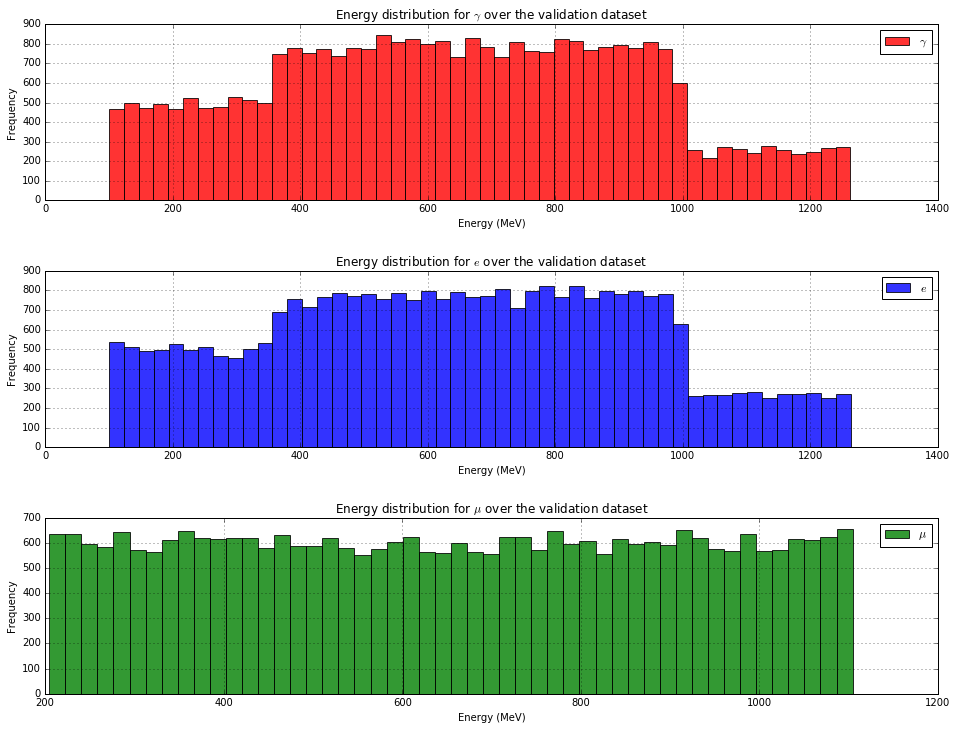

In [78]:
# Extract the energies for various particle types to plot the histogram
energies_dict = {}
energies_dict[0] = gamma_energies
energies_dict[1] = e_energies
energies_dict[2] = mu_energies

label_dict = {0:["gamma","r"], 1:["e","b"], 2:["mu","g"]}

fig, axes = plt.subplots(3,1,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

for label in energies_dict.keys():
    label_to_use = r"$\{0}$".format(label_dict[label][0]) if label_dict[label][0] is not "e" else r"${0}$".format(label_dict[label][0])
    axes[label].hist(energies_dict[label], bins=50, density=False, label=label_to_use, alpha=0.8,
                    color=label_dict[label][1])
    axes[label].legend()
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_ylabel("Frequency")
    axes[label].set_xlabel("Energy (MeV)")
    axes[label].set_title("Energy distribution for " + label_to_use + " over the validation dataset")

In [79]:
gamma_map = labels==0
gamma_indices = []
for i in range(len(gamma_map)):
    if(gamma_map[i]):
        gamma_indices.append(i)
        
e_map = labels==1
e_indices = []
for i in range(len(e_map)):
    if(e_map[i]):
        e_indices.append(i)
        
mu_map = labels==2
mu_indices = []
for i in range(len(mu_map)):
    if(mu_map[i]):
        mu_indices.append(i)

In [80]:
for i,j in zip(gamma_indices, range(len(gamma_energies))):
    energies[i] = gamma_energies[j]
    
for i,j in zip(e_indices, range(len(e_energies))):
    energies[i] = e_energies[j]

for i,j in zip(mu_indices, range(len(mu_energies))):
    energies[i] = mu_energies[j]

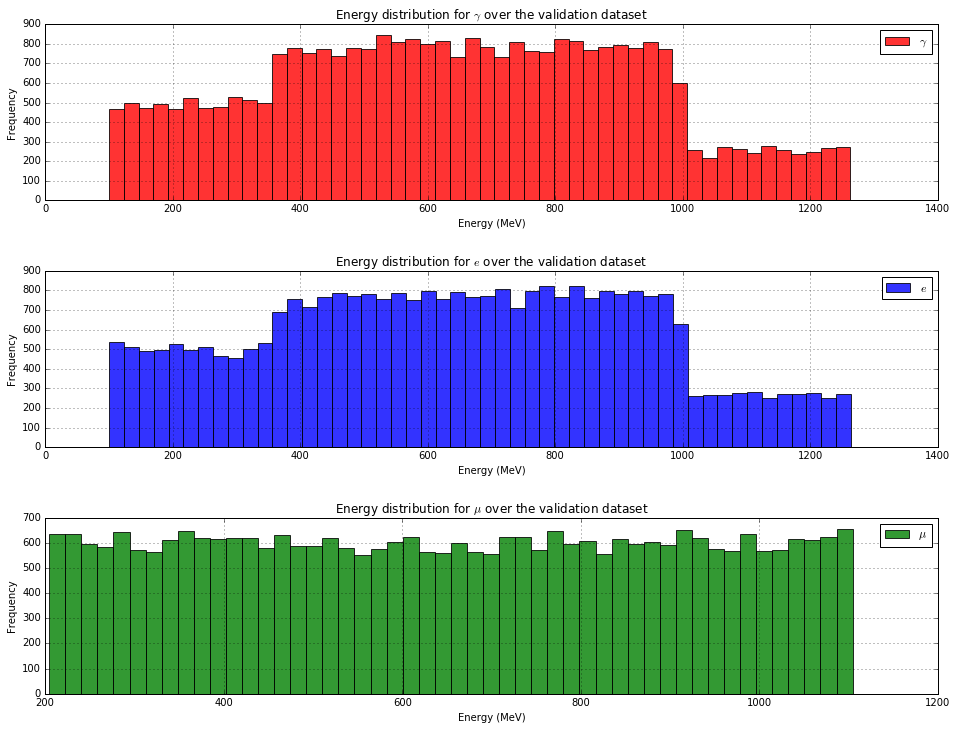

In [81]:
# Extact the energies for the corresponding particles
gamma_energies = energies[labels==0]
e_energies = energies[labels==1]
mu_energies = energies[labels==2]

# Extract the energies for various particle types to plot the histogram
energies_dict = {}
energies_dict[0] = gamma_energies
energies_dict[1] = e_energies
energies_dict[2] = mu_energies

label_dict = {0:["gamma","r"], 1:["e","b"], 2:["mu","g"]}

fig, axes = plt.subplots(3,1,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

for label in energies_dict.keys():
    label_to_use = r"$\{0}$".format(label_dict[label][0]) if label_dict[label][0] is not "e" else r"${0}$".format(label_dict[label][0])
    axes[label].hist(energies_dict[label], bins=50, density=False, label=label_to_use, alpha=0.8,
                    color=label_dict[label][1])
    axes[label].legend()
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_ylabel("Frequency")
    axes[label].set_xlabel("Energy (MeV)")
    axes[label].set_title("Energy distribution for " + label_to_use + " over the validation dataset")


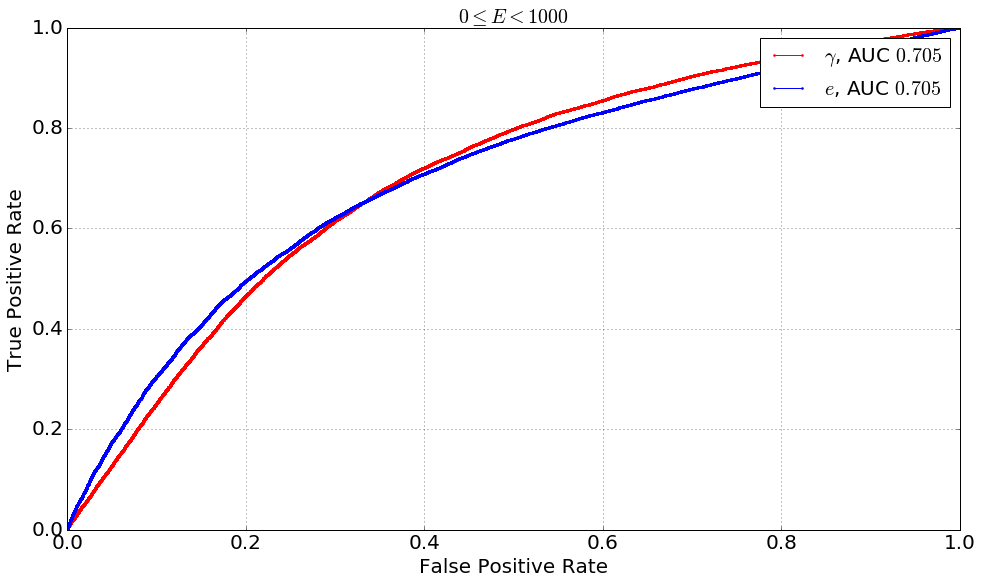

In [3]:
fpr_0, tpr_0, threshold_0, _, fpr_1, tpr_1, threshold_1, _ = plot_utils.plot_ROC_curve_one_vs_one(softmaxes,
                               labels,
                               energies,
                               {"gamma":0,"e":1},
                               "gamma",
                               "e",
                               0,
                               1000,
                               show_plot=True)

In [4]:
print("ROC curve statistics for electron :", fpr_1, tpr_1, threshold_1)

ROC curve statistics for electron : [0.00000000e+00 0.00000000e+00 6.67445353e-05 ... 9.99933255e-01
 9.99933255e-01 1.00000000e+00] [0.00000000e+00 3.34381061e-05 3.34381061e-05 ... 9.99966562e-01
 1.00000000e+00 1.00000000e+00] [1.9999924e+00 9.9999237e-01 9.9998939e-01 ... 1.0833099e-07 5.6007909e-08
 7.4565545e-09]


In [5]:
print(len(fpr_1))
print(len(tpr_1))
print(len(threshold_1))

26631
26631
26631


In [6]:
print(tpr_1[:100])

[0.00000000e+00 3.34381061e-05 3.34381061e-05 4.01257273e-04
 4.01257273e-04 4.34695379e-04 5.01571591e-04 6.35324015e-04
 7.02200227e-04 8.69390758e-04 9.36266970e-04 1.03658129e-03
 1.10345750e-03 1.17033371e-03 1.23720992e-03 1.30408614e-03
 1.30408614e-03 2.03972447e-03 2.10660068e-03 2.14003879e-03
 2.17347689e-03 2.24035311e-03 2.40754364e-03 2.47441985e-03
 2.47441985e-03 2.74192470e-03 2.74192470e-03 2.80880091e-03
 2.80880091e-03 2.90911523e-03 2.97599144e-03 3.17662008e-03
 3.24349629e-03 3.24349629e-03 3.34381061e-03 3.34381061e-03
 3.47756303e-03 3.47756303e-03 3.51100114e-03 3.51100114e-03
 3.61131546e-03 3.61131546e-03 3.81194409e-03 3.81194409e-03
 3.84538220e-03 3.97913462e-03 3.97913462e-03 4.07944894e-03
 4.07944894e-03 4.24663947e-03 4.31351568e-03 4.34695379e-03
 4.44726811e-03 4.51414432e-03 4.54758242e-03 4.54758242e-03
 4.61445864e-03 4.61445864e-03 4.81508727e-03 4.84852538e-03
 4.84852538e-03 4.91540159e-03 4.98227780e-03 5.28322076e-03
 5.28322076e-03 5.350096

In [8]:
threshold_index_dict = {}
tpr_values = [0.2, 0.5, 0.8]

for tpr_value in tpr_values:
    
    index_list = []
    
    for i in range(len(tpr_1)):
        if(math.fabs(tpr_1[i]-tpr_value) < 0.001):
            index_list.append(i)
        
    index = index_list[math.ceil(len(index_list)/2)]
    threshold_index_dict[tpr_value] = index
    
print(threshold_index_dict)
    
thresholds = []
for key in threshold_index_dict.keys():
    print("For TPR = {0}, threshold = {1:0.3f}".format(key, threshold_1[threshold_index_dict[key]]))
    thresholds.append(threshold_1[threshold_index_dict[key]])

{0.2: 3178, 0.5: 8988, 0.8: 18280}
For TPR = 0.2, threshold = 0.992
For TPR = 0.5, threshold = 0.823
For TPR = 0.8, threshold = 0.167


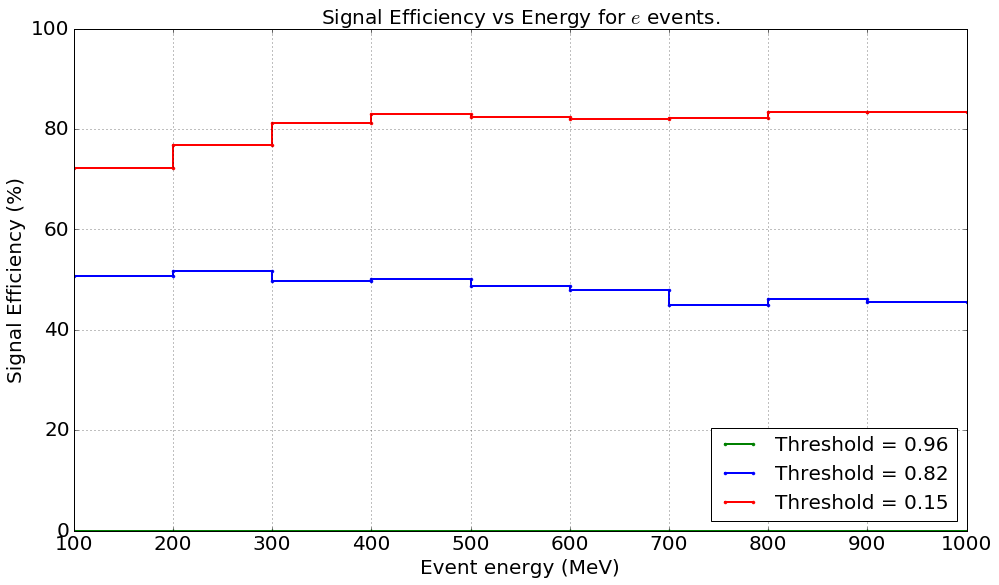

In [114]:
plot_utils.plot_signal_efficiency(softmaxes, labels, energies, index_dict={"e":1},
                                  particle="e", thresholds=thresholds, energy_interval=100,
                                  energy_min=100, energy_max = 1000, num_bins=20, save_path=None)

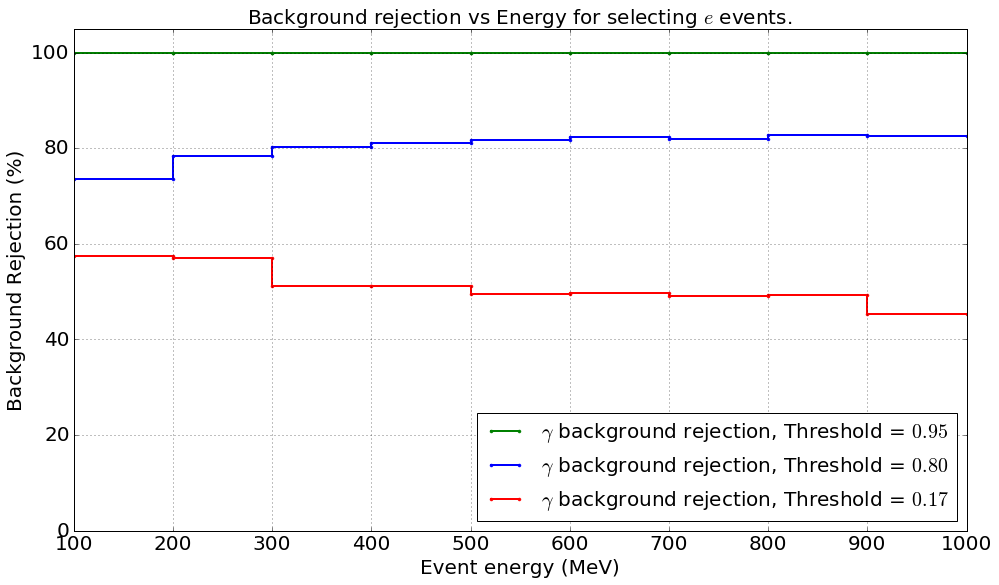

In [110]:
plot_utils.plot_background_rejection(softmaxes, labels, energies, index_dict={"gamma":0, "e":1},
                                     particle="e", thresholds=thresholds, energy_interval=100,
                                     energy_min=100, energy_max = 1000, num_bins=20, save_path=None)